In [160]:
import torch
import pandas as pd
from kan import KAN
from sklearn.model_selection import train_test_split
import os

In [161]:
print("Loading data...")
dataset = {}
df = pd.read_csv('pendulum_data.csv')

Loading data...


In [162]:
X = df[['length', 'gravity']].values
y = df['period'].values.reshape(-1, 1)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dataset['train_input'] = torch.from_numpy(X_train).float()
dataset['train_label'] = torch.from_numpy(y_train).float()
dataset['test_input'] = torch.from_numpy(X_test).float()
dataset['test_label'] = torch.from_numpy(y_test).float()

In [164]:
print("Initializing KAN model...")
model = KAN(width=[2, 1], grid=5, k=3, seed=0)
print("Training model...")
model.fit(dataset, opt="LBFGS", steps=100, lamb=0.01, lamb_l1=1.0)
print("Plotting results...")
if not os.path.exists('plots'):
    os.makedirs('plots')

Initializing KAN model...
checkpoint directory created: ./model
saving model version 0.0
Training model...


| train_loss: 4.49e-01 | test_loss: 4.68e-01 | reg: 3.45e+00 | : 100%|█| 100/100 [00:03<00:00, 28.43

saving model version 0.1
Plotting results...


Activation function plots saved in 'plots/' folder.


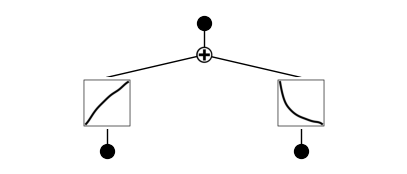

In [165]:
model.plot(folder="plots", beta=10)
print("Activation function plots saved in 'plots/' folder.")

Pruning model and manually extracting symbolic formula...
saving model version 0.2
Pruned model plot saved in 'plots/' folder.


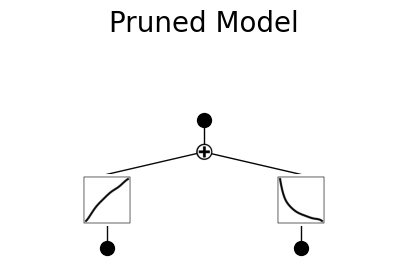

In [166]:
print("Pruning model and manually extracting symbolic formula...")
pruned_model = model.prune()
pruned_model.plot(folder="plots", title="Pruned Model")
print("Pruned model plot saved in 'plots/' folder.")

In [167]:
try:
    print("Attempting symbolic extraction using internal KAN tools...")
    pruned_model.auto_symbolic()
    formula_length, _ = pruned_model.symbolic_formula(0)
    formula_gravity, _ = pruned_model.symbolic_formula(1)
    print("\n--- Symbolic Formula Discovery ---")
    print(f"f(L) = {formula_length}")
    print(f"f(g) = {formula_gravity}")
except Exception as e:
    print(f"Symbolic extraction failed: {e}")
    print("Please check the plots to interpret the learned functions manually.")

Attempting symbolic extraction using internal KAN tools...
fixing (0,0,0) with x^0.5, r2=0.9991370439529419, c=2
fixing (0,1,0) with 1/x^0.5, r2=0.9996287822723389, c=2
saving model version 0.3
Symbolic extraction failed: 'int' object is not subscriptable
Please check the plots to interpret the learned functions manually.
